<a href="https://colab.research.google.com/github/zkhan04/ai-experiments/blob/master/audio-ai/Audio_features_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/My\ Drive/Colab\ Data/audio

alisha_data.pkl  arif_data.pkl	runningwater  zayd_data.pkl


In [ ]:
!pip install librosa

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
import os

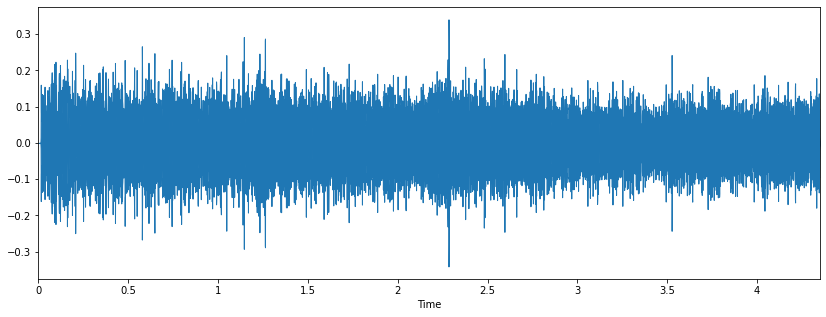

In [ ]:
y , sr = librosa.load('/content/gdrive/My Drive/Colab Data/audio/runningwater/true/RunningWater3.mp4')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=y, sr=sr)

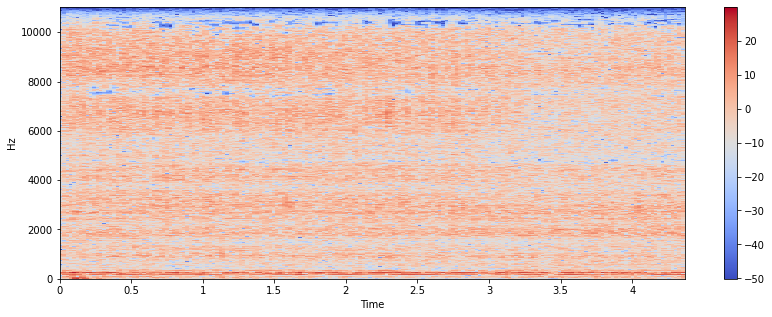

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

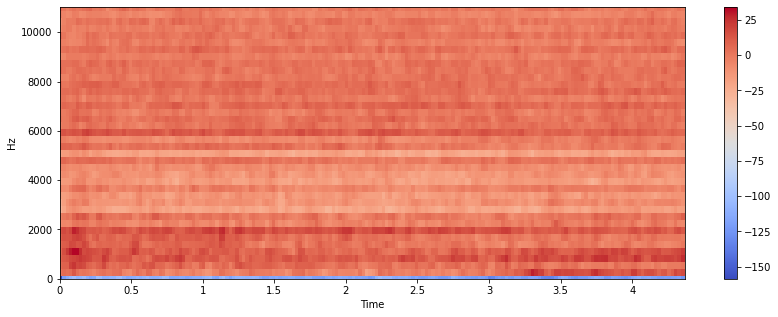

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
mfccs

array([[-1.58588789e+02, -1.19772043e+02, -1.11408329e+02, ...,
        -1.19433997e+02, -1.16672683e+02, -1.24853417e+02],
       [ 1.32322479e+00,  6.03132510e+00,  3.56394969e+00, ...,
         1.84091407e+01,  1.48580613e+01,  1.75204266e+01],
       [ 6.48815872e+00,  9.33617462e+00,  9.92314630e+00, ...,
        -3.11675943e-01, -2.50227037e-01,  1.27814619e+00],
       ...,
       [-8.35814371e+00, -3.53215676e+00,  6.86699168e-02, ...,
         4.72122595e+00, -6.23208140e-01, -3.16112078e+00],
       [-1.76308461e+00, -4.28549903e+00, -6.53812647e+00, ...,
        -1.93664495e+00, -4.08282492e+00, -4.95829300e+00],
       [ 5.35386047e+00,  1.46731305e+00, -2.64061356e+00, ...,
        -1.01155655e+00,  1.91760939e+00,  1.45169111e-01]])

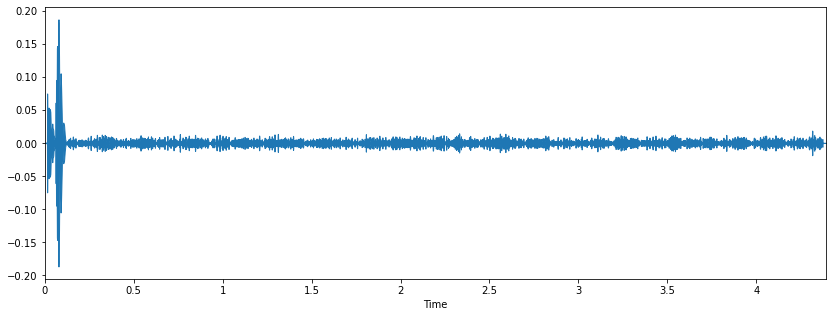

In [ ]:
y , sr = librosa.load('/content/gdrive/My Drive/Colab Data/audio/runningwater/false/NoRunningWater3.mp4')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

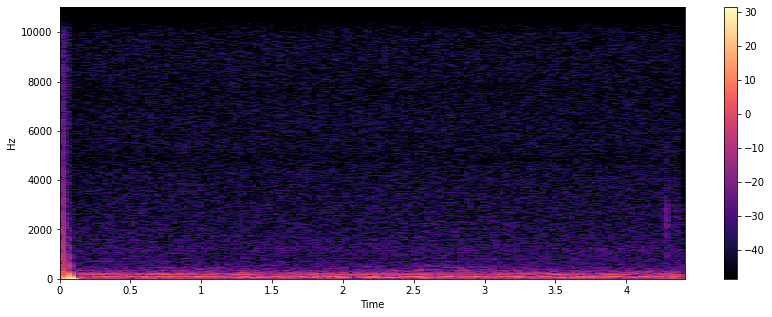

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

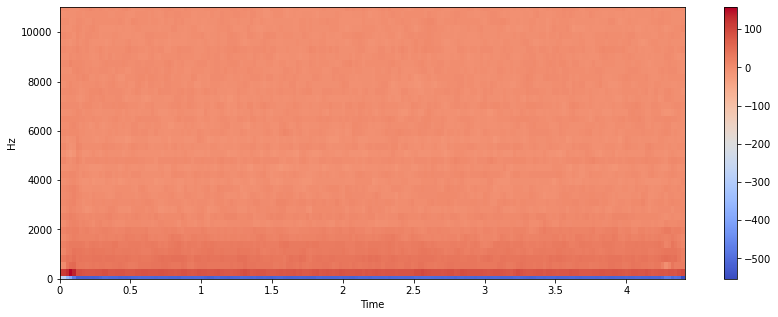

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [ ]:
# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/content/gdrive/My Drive/Colab Data/audio/runningwater'


In [ ]:
features = []
for class_label in os.listdir(fulldatasetpath):
  print(class_label)
  for file in os.listdir(os.path.join(fulldatasetpath, class_label)):
    print(file)
    file_name = os.path.join(fulldatasetpath, class_label, file)
    print(file_name)
    data = extract_features(file_name)
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

true
RunningWater1.mp4
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/RunningWater1.mp4
RunningWater2.mp4
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/RunningWater2.mp4
RunningWater3.mp4
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/RunningWater3.mp4
20200730 172635.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172635.m4a
20200730 172642.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172642.m4a
20200730 172647.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172647.m4a
20200730 172653.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172653.m4a
20200730 172700.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172700.m4a
20200730 172709.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172709.m4a
20200730 172716.m4a
/content/gdrive/My Drive/Colab Data/audio/runningwater/true/20200730 172716.m4a
2020073

In [ ]:
featuresdf

,feature,class_label
0,"[-349.6761883061811, 77.97523127033531, -39.60...",true
1,"[-162.9719763103223, 14.484394950908994, -8.11...",true
2,"[-123.59541613826386, 14.752998048912946, -7.2...",true
3,"[-224.82055260907148, 51.0820508547996, -3.274...",true
4,"[-157.86453794559563, 35.08948012718332, -10.6...",true
...,...,...
194,"[-241.3405578986279, 63.90872696519794, -18.75...",false
195,"[-491.51690450684833, 78.82440906291254, 16.72...",false
196,"[-532.1695030260717, 56.05748791953128, 8.1457...",false
197,"[-371.95120095021525, 75.61944273301503, -1.30...",false


In [ ]:
os.listdir(fulldatasetpath)

['true', 'false']

In [ ]:
featuresdf.to_pickle(os.path.join('/content/gdrive/My Drive/Colab Data/audio', 'zayd_data.pkl'))